<a href="https://colab.research.google.com/github/idrisskc/Insurance_charges_ML/blob/main/Insurance_charges_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from math import sqrt

In [2]:
data = pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Ages_Charges')

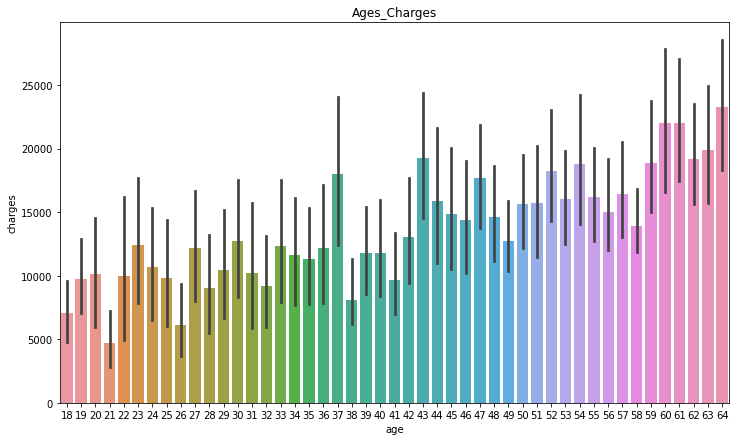

In [6]:
plt.figure(figsize=(12,7))
sns.barplot(x="age", y="charges", data=data)
plt.title("Ages_Charges")

Text(0.5, 1.0, 'Sex_Charges')

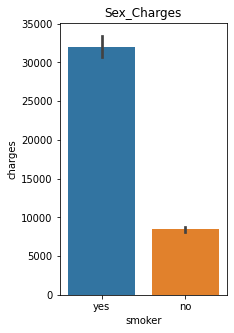

In [7]:
plt.figure(figsize=(3,5))
sns.barplot(x="smoker", y="charges", data=data)
plt.title("Smoker_Charges")

Text(0.5, 1.0, 'Smoker_Region')

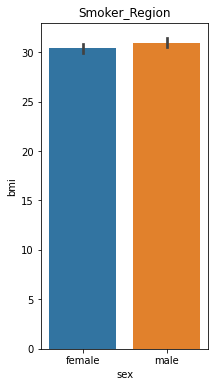

In [10]:
plt.figure(figsize=(3,6))
sns.barplot(x="sex", y="bmi", data=data)
plt.title("Sex_Bmi")

Text(0.5, 1.0, 'Age_Bmi')

<Figure size 1008x720 with 0 Axes>

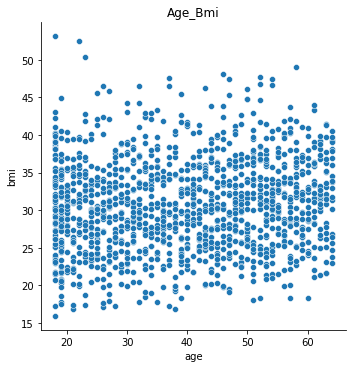

In [22]:
plt.figure(figsize=(14,10))
sns.relplot(x="age", y="bmi", data=data)
plt.title("Age_Bmi")

Text(0.5, 1.0, 'Bmi_children')

<Figure size 1008x720 with 0 Axes>

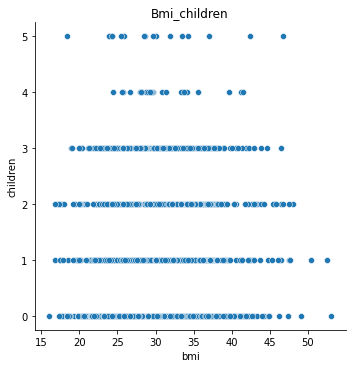

In [17]:
plt.figure(figsize=(14,10))
sns.relplot(x="bmi", y="children", data=data)
plt.title("Bmi_children")

Text(0.5, 1.0, 'Bmi_charges')

<Figure size 1008x720 with 0 Axes>

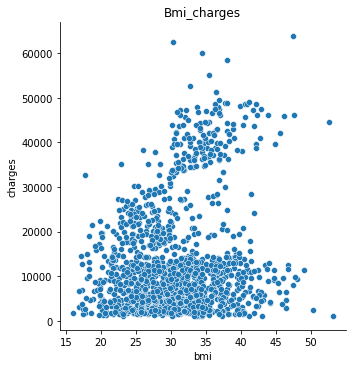

In [20]:
plt.figure(figsize=(14,10))
sns.relplot(x="bmi", y="charges", data=data)
plt.title("Bmi_charges")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


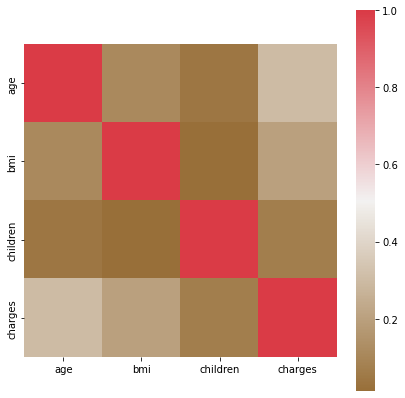

In [21]:
f, axes = plt.subplots(figsize = (7, 7))

c = data.corr()
sns.heatmap(c, mask = np.zeros_like(c, dtype = np.bool), cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = axes)

In [ ]:
data = data.drop("region", axis=1)
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')


label encoding

```
# `Ce texte est au format code`
```



In [ ]:
l_encoder = LabelEncoder()
data["sex"] = l_encoder.fit_transform(data["sex"])
data["smoker"] = l_encoder.fit_transform(data["smoker"])

data["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [ ]:

data["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [ ]:
X = data.drop(columns=["charges"])
y = data["charges"]

Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1)

Fit the Model and Predict before Checking Accuracy

In [ ]:
l_r = LinearRegression()
l_r.fit(X_train, y_train)

y_predict = l_r.predict(X_test)

MSE = mean_squared_error(y_test, y_predict)
print("MSE:", MSE)

RMSE = sqrt(mean_squared_error(y_test, y_predict))       
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_predict)
print('R2 :', R2)

MSE: 36910222.279693276
RMSE:  6075.378365146757
R2 : 0.7397570354983795


In [ ]:
from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(X_train, y_train)
y_predict = svr_model.predict(X_test)

MSE = mean_squared_error(y_test, y_predict)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_predict))       
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_predict)
print('R2 :', R2)

MSE:  166827484.1517451
RMSE:  12916.171420035625
R2 : -0.17625081493706074


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()

dtr_model.fit(X_train, y_train)
y_predict = dtr_model.predict(X_test)

MSE = mean_squared_error(y_test, y_predict)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_predict))       
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_predict)
print('R2 :', R2)


MSE:  44384070.34317776
RMSE:  6662.137070278407
R2 : 0.6870611627524172


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

rfr_model.fit(X_train, y_train)
y_predict = rfr_model.predict(X_test)

MSE = mean_squared_error(y_test, y_predict)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_predict))       
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_predict)
print('R2 :', R2)

MSE:  21867378.5507131
RMSE:  4676.256895286347
R2 : 0.84581963834318


after comparing the different models based on their score, it turns out that the RandomForest model is the best